In [1]:
#module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#SKLEARN
from sklearn.model_selection import train_test_split

#
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
 

In [2]:
filepath = "./Task 3 and 4_Loan_Data.csv"
data = pd.read_csv(filepath)
print ('shape of data: ',data.shape)
data.head()

shape of data:  (10000, 8)


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


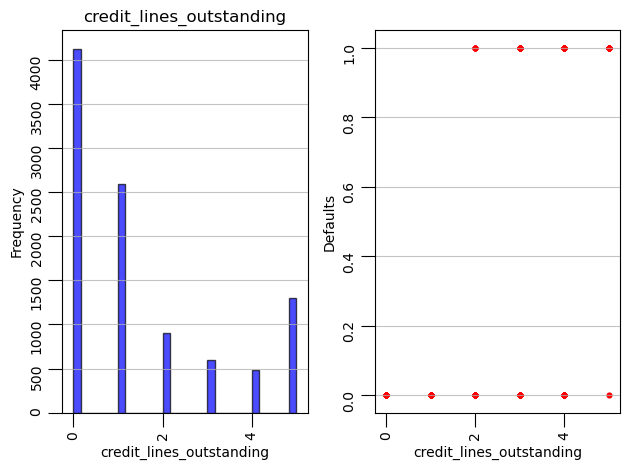

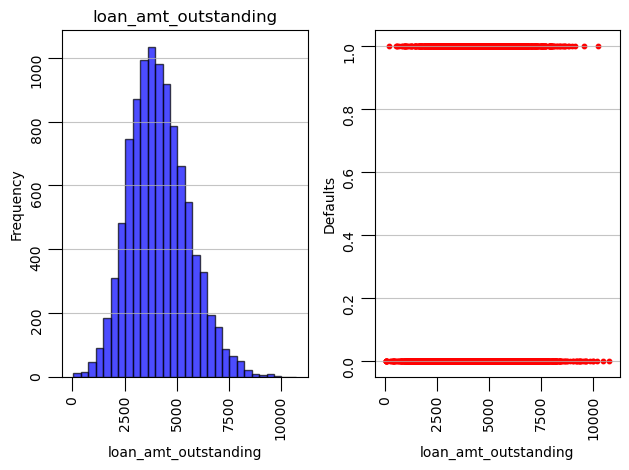

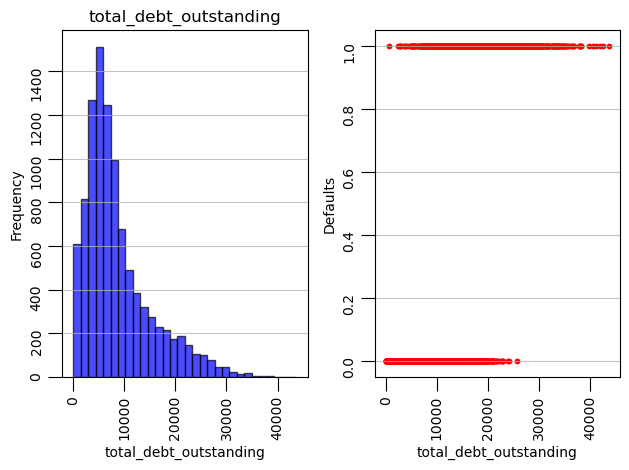

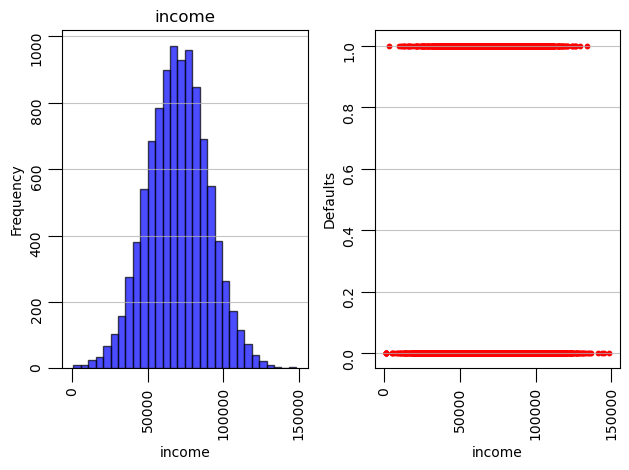

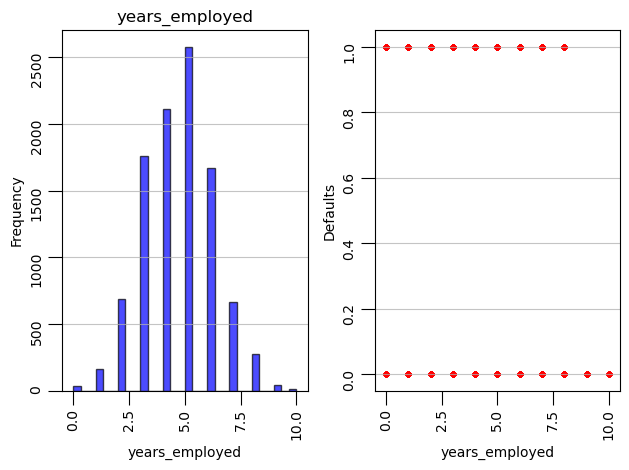

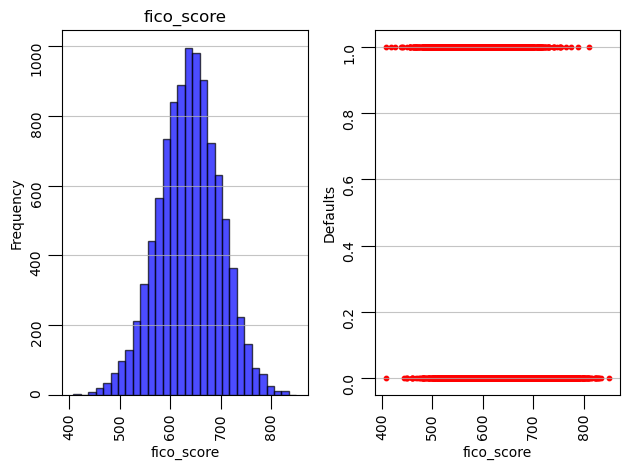

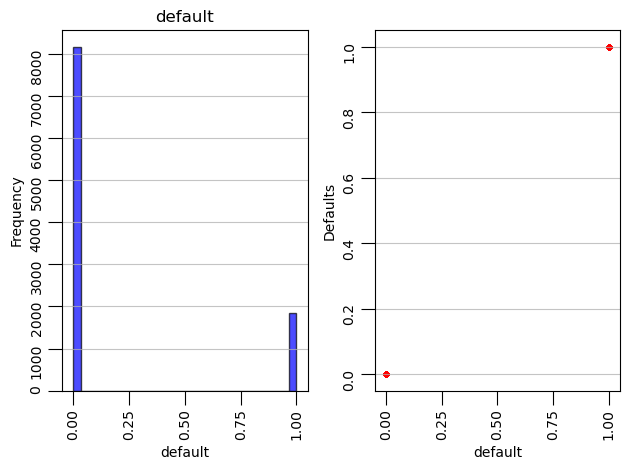

In [3]:
#PLOTTING
headers = data.columns.tolist()
for i in range(1,len(headers)):
  fig, axes = plt.subplots(1, 2)

  axes[0].hist(data[headers[i]], bins=30, color='blue', edgecolor='black', alpha=0.7)
  axes[0].set_title(headers[i])
  axes[0].set_xlabel(headers[i])
  axes[0].set_ylabel("Frequency")

  axes[0].grid(axis='y', alpha=0.75)
  axes[0].tick_params(size=10, rotation=90)
 


  axes[1].scatter(data[headers[i]], data[headers[-1]], color='red', marker='o', s=10)
  axes[1].set_xlabel(headers[i])
  axes[1].set_ylabel('Defaults')

  axes[1].grid(axis='y', alpha=0.75)
  axes[1].tick_params(size=10, rotation=90)

  fig.tight_layout()

 

In [4]:
# Data : Features and Target
X=data.iloc[:,1:-1]
Y=data.iloc[:,-1]


In [5]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

In [6]:
# Train SVM with RBF kernel and probability enabled
model = SVC(kernel='rbf', probability=True, random_state=42)

model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [7]:
#Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Show predicted probabilities for the first 5 test samples
print("\nPredicted probabilities (first 5 samples):")
print(y_proba[:5])

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1621
           1       0.97      0.92      0.94       379

    accuracy                           0.98      2000
   macro avg       0.98      0.95      0.97      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix:
[[1611   10]
 [  32  347]]
Accuracy: 0.98

Predicted probabilities (first 5 samples):
[[9.66700988e-01 3.32990123e-02]
 [9.99999900e-01 1.00000010e-07]
 [9.99999345e-01 6.54981257e-07]
 [9.99999900e-01 1.00000010e-07]
 [9.99999900e-01 1.00000010e-07]]


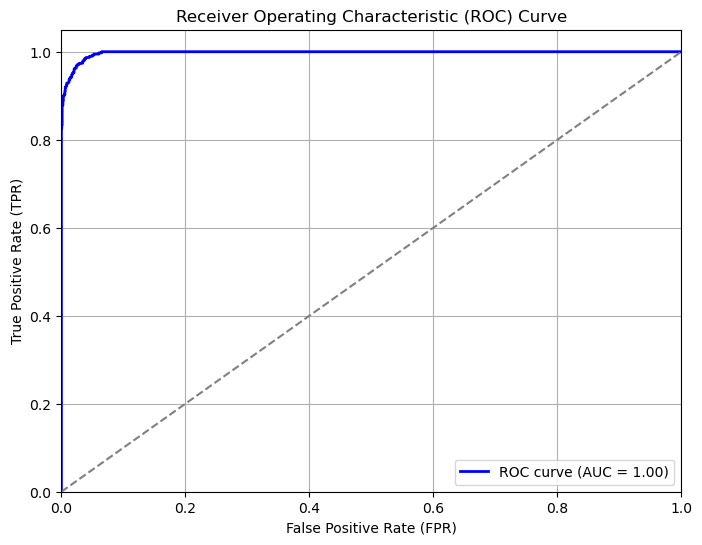

In [8]:
# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class (class 1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
 

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier (diagonal line)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

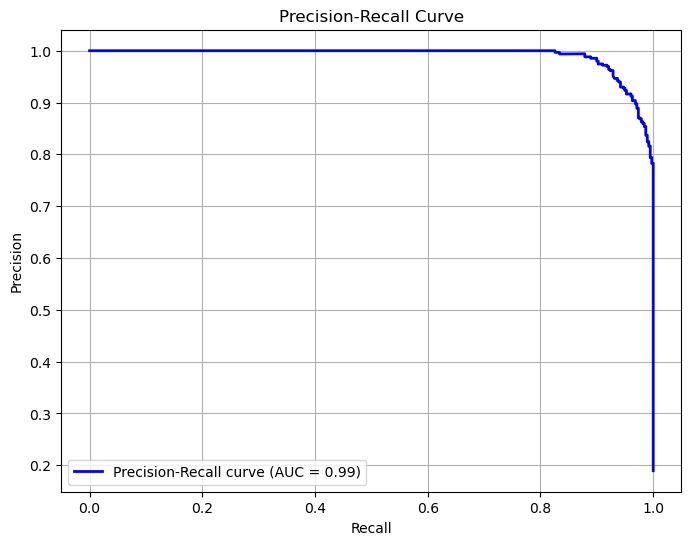

In [9]:
# Compute Precision and Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Compute the AUC for Precision-Recall curve
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  \
0             3915.471226  78039.38546               5         605        0   
1             8228.752520  26648.43525               2         572        1   
2             2027.830850  65866.71246               4         602        0   
3             2501.730397  74356.88347               5         612        0   
4             1768.826187  23448.32631               6         631        0   

   predicted  
0          0  
1          1  
2          0  
3          0  
4          0  


C:\Users\KIIT\AppData\Local\Temp\ipykernel_14228\809527702.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


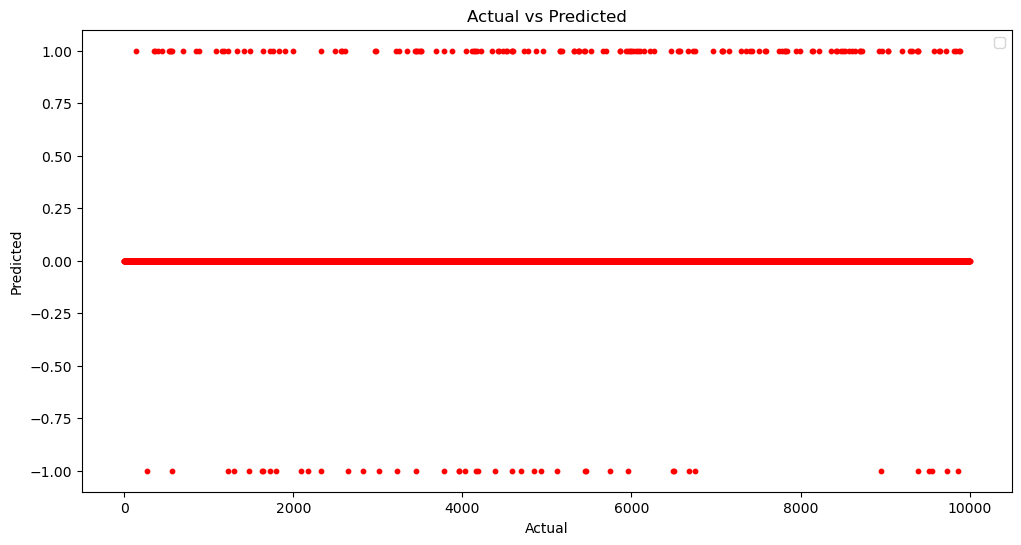

In [10]:
#Visualization
data['predicted'] = model.predict(X)  # Predictions on full dataset

print (data.head())

plt.figure(figsize=(12, 6))

index=np.arange(0,len(data))
#ax=plt.scatter(data['default'], data['predicted'], color='red', marker='o', s=10)
ax=plt.scatter(index, data['default'] - data['predicted'], color='red', marker='o', s=10)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [ ]:
print ('Loan details')

X_unseen = pd.DataFrame(columns=headers[1:-1])

# Input the values from the user
for i in range(1, len(headers) - 1):  # Skip the last column (target)
    value = input(f"Enter value for {headers[i]}: ")
    # Append the value to the DataFrame (create a new row)
    X_unseen.loc[0, headers[i]] = value

print ("Default = ", model.predict(X_unseen))
  

Loan details
